### Linear Regression Practical Implementation 


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [43]:
from sklearn.datasets import fetch_california_housing 

#load the dataset 
df = fetch_california_housing()
# X,y = california_housing.data , california_housing.target 

In [44]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [47]:
dataset= pd.DataFrame(df.data)

In [48]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
dataset.columns=df.feature_names

In [52]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [53]:
## independent features and dependent features 

X = dataset 
y = df.target

In [54]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [56]:
## train test split
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(
    X, y, test_size = 0.30 , random_state= 40
)

In [59]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14827,1.6389,37.0,3.733333,1.000000,1086.0,3.290909,32.66,-117.09
12640,2.1679,34.0,4.792405,1.050633,884.0,2.237975,38.53,-121.45
6016,2.4464,33.0,3.520000,0.906667,964.0,3.213333,34.06,-117.78
13650,1.9926,37.0,4.143478,1.004348,611.0,2.656522,34.08,-117.31
13275,2.6582,15.0,4.540208,1.143803,2554.0,2.416272,34.10,-117.63
...,...,...,...,...,...,...,...,...
11532,1.7675,26.0,3.847093,1.082556,1829.0,1.312994,33.77,-118.09
16065,4.4375,49.0,5.439506,1.004938,1052.0,2.597531,37.75,-122.48
14501,3.0450,16.0,2.708804,1.056433,648.0,1.462754,32.86,-117.23
14555,6.7120,15.0,7.844291,1.010381,1180.0,4.083045,32.96,-117.13


In [60]:
##  standardizing the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)

In [64]:
X_test =scaler.transform(X_test)  

In [66]:
from sklearn.linear_model import LinearRegression
# cross validation 
from sklearn.model_selection import cross_val_score 

In [87]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [89]:
np.mean(mse)

np.float64(-0.520932273639591)

In [92]:
## prediction test data

reg_pred =regression.predict(X_test)

In [93]:
reg_pred

array([2.00526434, 2.57916713, 1.18677306, ..., 1.67144018, 2.43598237,
       1.59890132])

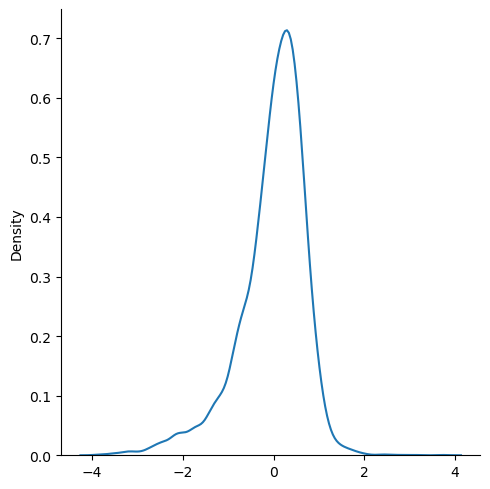

In [94]:
import seaborn as sns 
sns.displot(reg_pred-y_test,kind = 'kde')

In [96]:
from sklearn.metrics import r2_score

In [97]:
score = r2_score(reg_pred,y_test)

In [98]:
score 


0.3274299203904162